In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
from IPython import display
display.set_matplotlib_formats('svg')

/var/folders/nn/4_714bpd2qz7gm9d27_r3qw40000gn/T/ipykernel_16692/2576823575.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


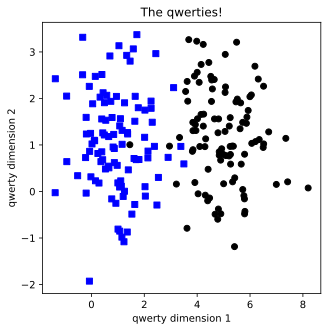

In [10]:
# create data

nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [11]:
# inspect types
print(type(data_np))
print(np.shape(data_np))
print(' ')

print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(200, 2)
 
<class 'torch.Tensor'>
torch.Size([200, 2])


In [24]:
# Build the model
ANNclassify = nn.Sequential(
                nn.Linear(2,1),
                nn.ReLU(),
                nn.Linear(1,1),
                nn.Sigmoid()
)

In [25]:
# other model features
learningRate = 0.01

# loss function
lossfun = nn.BCELoss()

#optimiser
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr = learningRate)

In [26]:
# train the model
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):
    # forward pass
    yHat = ANNclassify(data)
    
    #compute loss
    loss = lossfun(yHat, labels)
    losses[epochi] = loss
    
    #backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

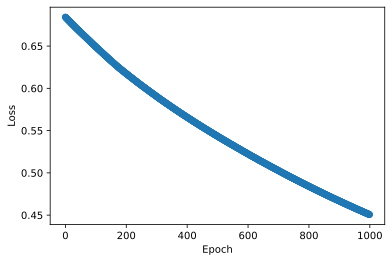

In [27]:
# show the losses
plt.plot(losses.detach(), 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [28]:
# compute the predictions

# final forward pass
predictions = ANNclassify(data)

predlabels = predictions > 0.5

# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy
totalacc = 100 - 100*len(misclassified)/(2*nPerClust)

print(f'Final accuracy: {totalacc:.2f}')

Final accuracy: 85.00


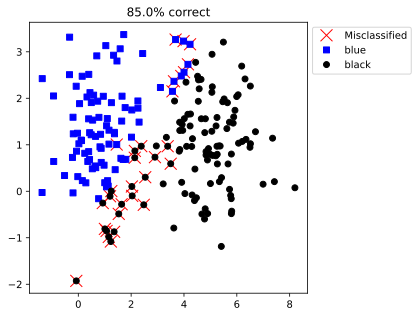

In [29]:
# plot the labeled data

fig = plt.figure(figsize = (5, 5))
plt.plot(data[misclassified, 0], data[misclassified, 1], 'rx', markersize = 12)
plt.plot(data[np.where(~predlabels)[0], 0], data[np.where(~predlabels)[0], 1], 'bs')
plt.plot(data[np.where(predlabels)[0], 0], data[np.where(predlabels)[0], 1], 'ko')
plt.legend(['Misclassified', 'blue', 'black'], bbox_to_anchor =(1,1))
plt.title(f'{totalacc}% correct')
plt.show()